# Electronic Fraud Detection 
## 1) Problem Statement
###  -- We have to Detect the Fraud Transactions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [2]:
data = pd.read_csv("D:\Python_imarticus_Pranjal_sir\project\electronic_payment.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Dataset Description:

Reading/Importing the dataset

--- Dataset details ---

1)step: represents a unit of time where 1 step equals 1 hour

2)type: type of online transaction

3)amount: the amount of the transaction

4)nameOrig: customer starting the transaction

5)oldbalanceOrg: balance before the transaction

6)newbalanceOrig: balance after the transaction

7)nameDest: recipient of the transaction

8)oldbalanceDest: initial balance of recipient before the transaction

9)newbalanceDest: the new balance of recipient after the transaction

10)isFraud: fraud transaction

In [4]:
data.shape

(1048575, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
object_columns = data.select_dtypes(include=['object']).columns
print('Object Type Columns:-')
print(object_columns)

num_columns = data.select_dtypes(include=['int','float64']).columns
print('\nNumerical Type Columns:-')
print(num_columns)

Object Type Columns:-
Index(['type', 'nameOrig', 'nameDest'], dtype='object')

Numerical Type Columns:-
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [7]:
data.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
isFlaggedFraud          1
dtype: int64

## Handling Null values

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no Null values

# Exploratory Data Analysis

In [9]:
data['step'].unique()  

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

In [10]:
import warnings
warnings.filterwarnings('ignore')

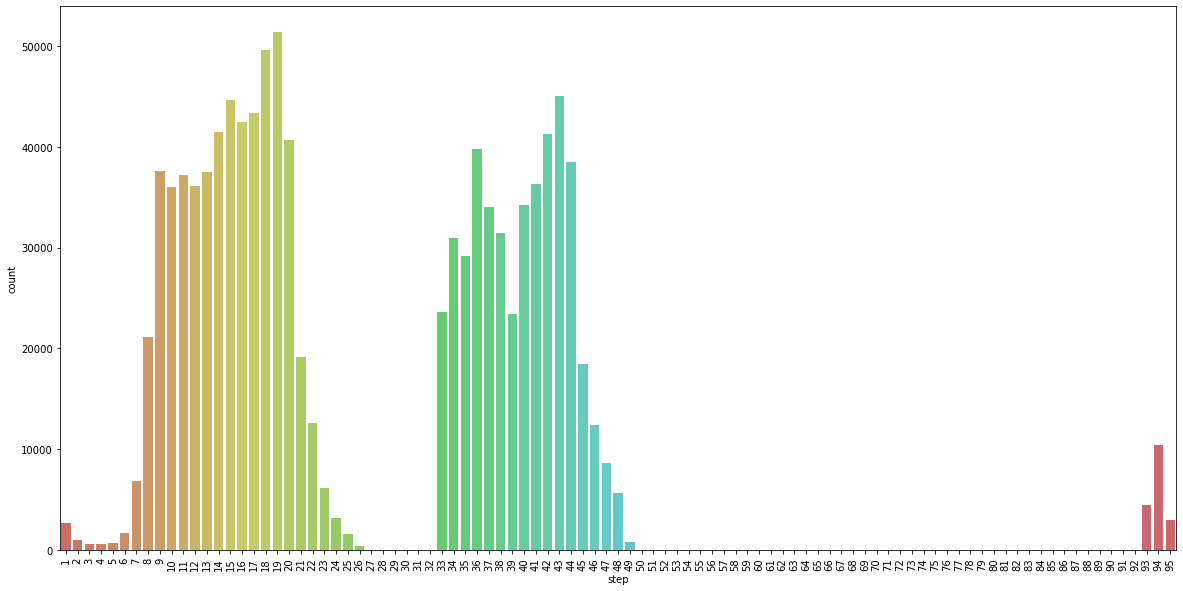

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data['step'],data=data ,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [12]:
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

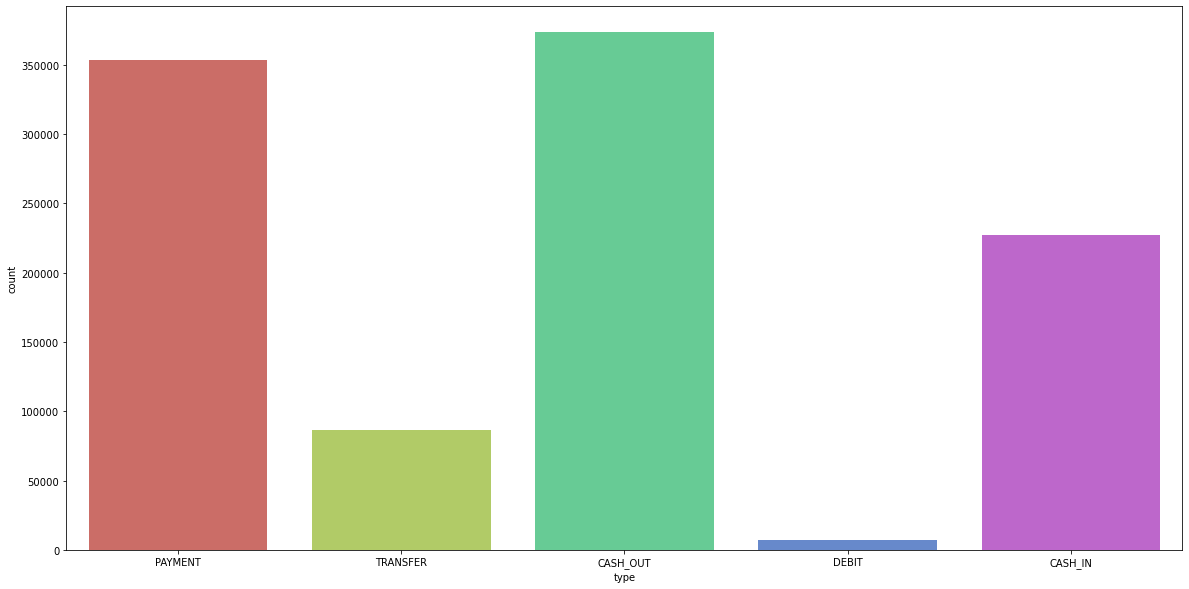

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data['type'], data = data, palette = 'hls')
plt.show()

In [14]:
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

--Imblanced data

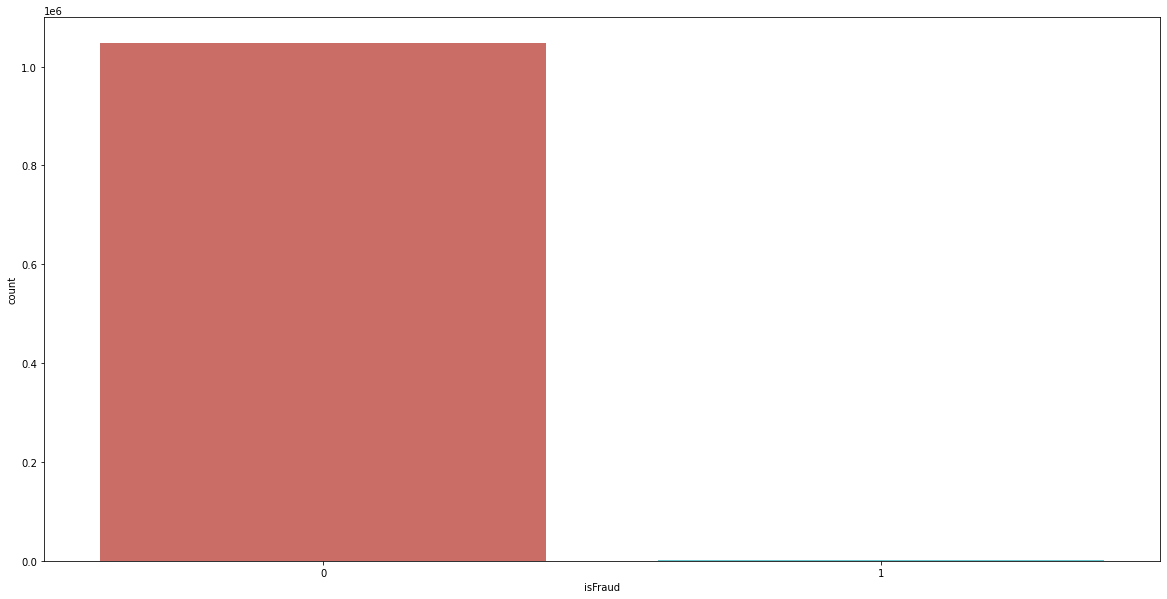

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(data['isFraud'], data = data, palette = 'hls')
plt.show()

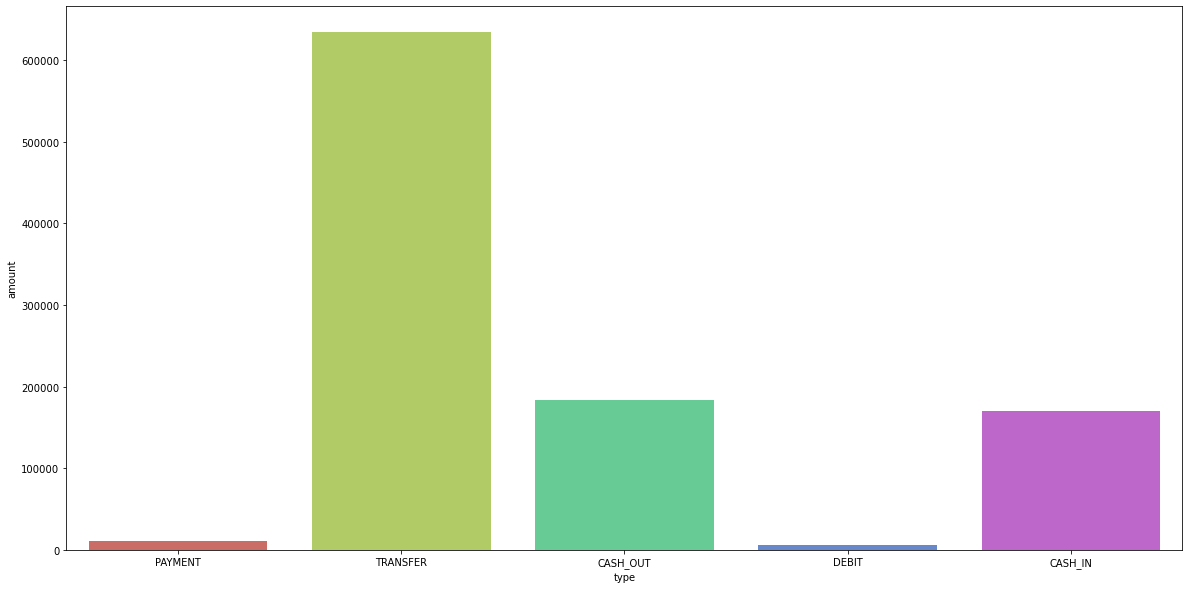

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x = data['type'], y = data['amount'], data = data, ci=None, palette = 'hls')
plt.show()

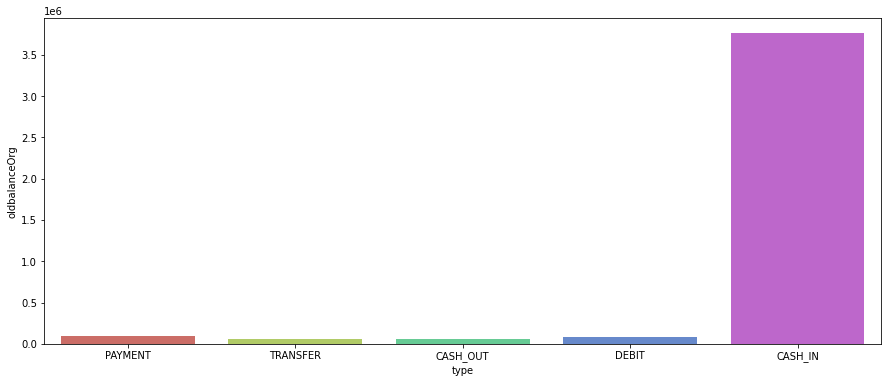

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['type'], y = data['oldbalanceOrg'], data = data,ci=None, palette = 'hls')
plt.show()

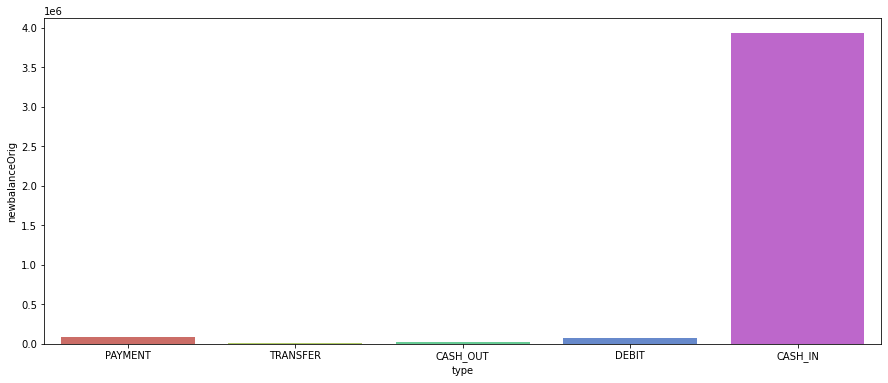

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['type'], y = data['newbalanceOrig'], data = data,ci=None, palette = 'hls')
plt.show()

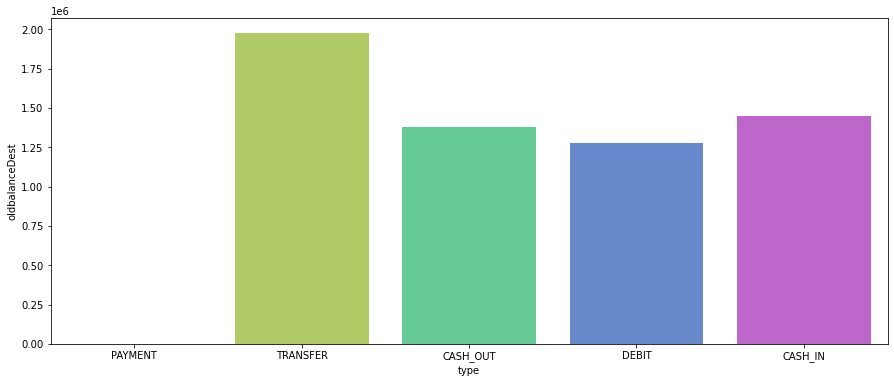

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['type'], y = data['oldbalanceDest'], data = data,ci=None, palette = 'hls')
plt.show()

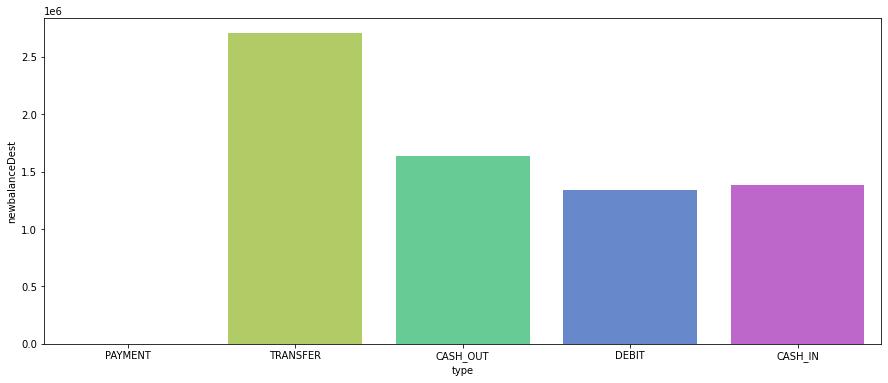

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['type'], y = data['newbalanceDest'], data = data,ci=None, palette = 'hls')
plt.show()

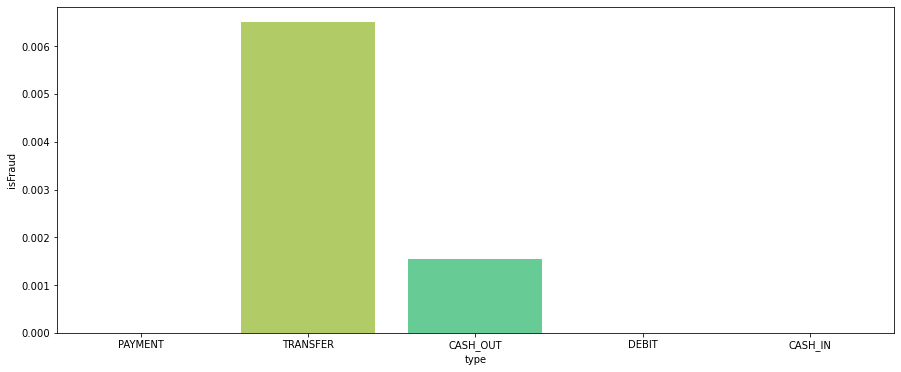

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['type'], y = data['isFraud'], data = data,ci=None,  palette = 'hls')
plt.show()

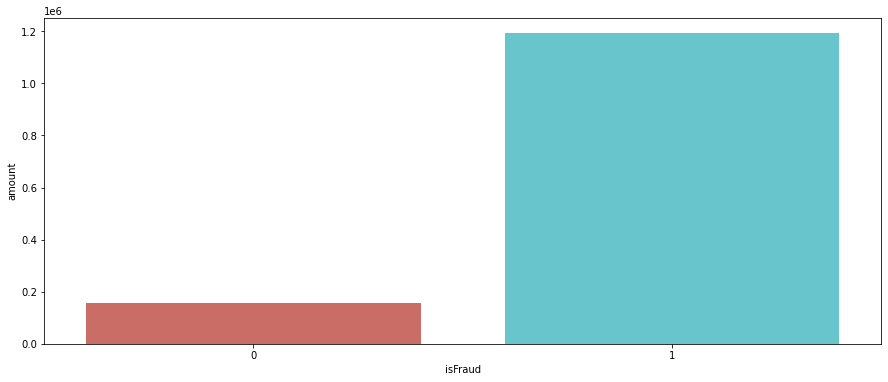

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['isFraud'], y = data['amount'], data = data, ci = None, palette = 'hls')
plt.show()

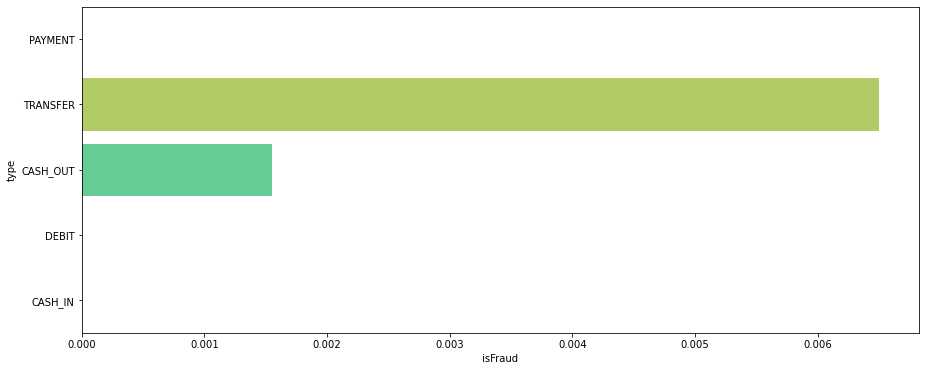

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x = data['isFraud'], y = data['type'], data = data, ci = None, palette = 'hls')
plt.show()

### Converting type column into numeric and Removing Unwanted columns which cannot be used for model building

In [24]:
data.type.replace({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,
                   'TRANSFER':4,'DEBIT':5},inplace=True)

In [25]:
data = data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [26]:
data.shape

(1048575, 8)

### Correlation between columns

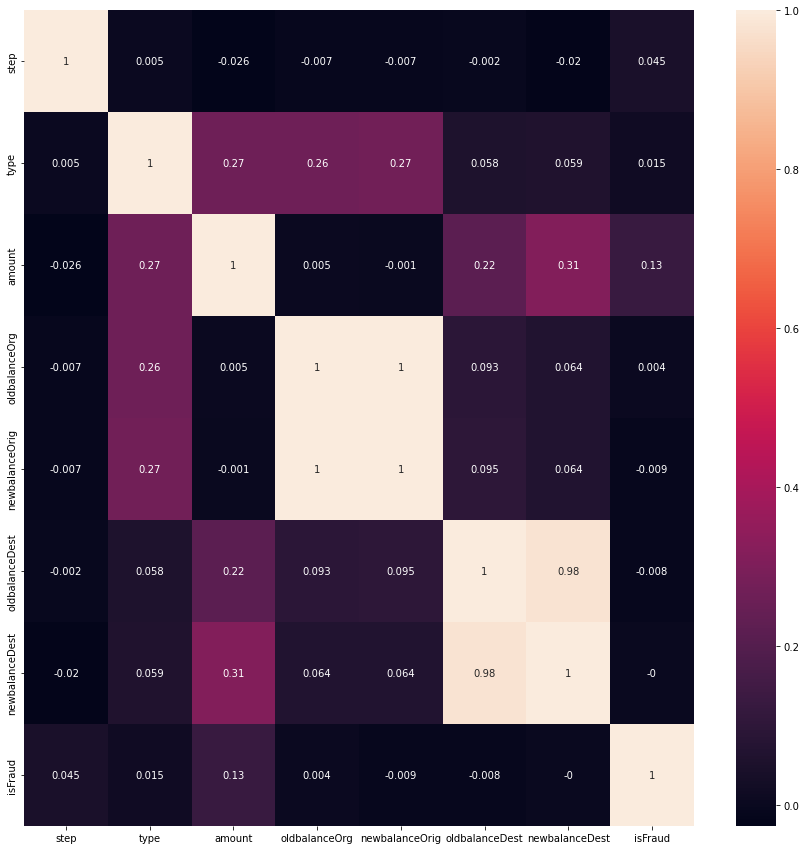

In [27]:
plt.figure(figsize =(15,15))
sns.heatmap(data.corr().round(3) , annot = True ,cmap="rocket" );

# Handling unbalanced data using SMOTE 

In [28]:
df_new = data.copy()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.model_selection import train_test_split

df_new_train , df_new_test = train_test_split(df_new , test_size = .25)

In [31]:
df_new_train_x = df_new_train.iloc[:,0:-1]
df_new_train_y = df_new_train.iloc[: ,-1]

df_new_test_x = df_new_test.iloc[:,0:-1]
df_new_test_y = df_new_test.iloc[: ,-1]

In [32]:
import imblearn
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE()

In [34]:
sm.fit(df_new_train_x , df_new_train_y)

SMOTE()

In [35]:
df_new_train_x1 , df_new_train_y1 = sm.fit_resample(df_new_train_x , df_new_train_y)

In [36]:
df_new_train_y.value_counts()

0    785589
1       842
Name: isFraud, dtype: int64

In [37]:
df_new_train_y1.value_counts()

0    785589
1    785589
Name: isFraud, dtype: int64

# Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [39]:
lr.fit(df_new_train_x1 , df_new_train_y1)

LogisticRegression()

In [40]:
predict = lr.predict(df_new_test_x)

In [ ]:
log_accuracy = accuracy_score(df_new_test_y, predict)

In [41]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(df_new_test_y, predict))
print("Precision:", precision_score(df_new_test_y, predict))
print("Recall:", recall_score(df_new_test_y, predict))
print("F1 Score:", f1_score(df_new_test_y, predict))
print("Confusion Matrix:")
print(confusion_matrix(df_new_test_y, predict))
print("Classification Report:")
print(classification_report(df_new_test_y, predict))
print()

Logistic Regression:
Accuracy: 0.9220809936523438
Precision: 0.014052540081128067
Recall: 0.97
F1 Score: 0.027703731911652704
Confusion Matrix:
[[241427  20417]
 [     9    291]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    261844
           1       0.01      0.97      0.03       300

    accuracy                           0.92    262144
   macro avg       0.51      0.95      0.49    262144
weighted avg       1.00      0.92      0.96    262144




# DecisionTree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier()
dt.fit(df_new_train_x1 , df_new_train_y1)

DecisionTreeClassifier()

In [44]:
dt_y_pred = dt.predict(df_new_test_x)

In [58]:
dt_accuracy =accuracy_score(df_new_test_y, dt_y_pred)

In [56]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(df_new_test_y, dt_y_pred))
print("Precision:", precision_score(df_new_test_y, dt_y_pred))
print("Recall:", recall_score(df_new_test_y, dt_y_pred))
print("F1 Score:", f1_score(df_new_test_y, dt_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(df_new_test_y, dt_y_pred))
print("Classification Report:")
print(classification_report(df_new_test_y, dt_y_pred))
print()

Decision Tree:
Accuracy: 0.9985542297363281
Precision: 0.4355628058727569
Recall: 0.89
F1 Score: 0.5848849945235488
Confusion Matrix:
[[261498    346]
 [    33    267]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261844
           1       0.44      0.89      0.58       300

    accuracy                           1.00    262144
   macro avg       0.72      0.94      0.79    262144
weighted avg       1.00      1.00      1.00    262144




# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [47]:
knn.fit(df_new_train_x1 , df_new_train_y1)

KNeighborsClassifier()

In [50]:
pred_knn = knn.predict(df_new_test_x)

In [59]:
knn_accuracy = accuracy_score(df_new_test_y, pred_knn)

In [51]:
print("KNeighbors:")
print("Accuracy:", accuracy_score(df_new_test_y, pred_knn))
print("Precision:", precision_score(df_new_test_y, pred_knn))
print("Recall:", recall_score(df_new_test_y, pred_knn))
print("F1 Score:", f1_score(df_new_test_y, pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(df_new_test_y, pred_knn))
print("Classification Report:")
print(classification_report(df_new_test_y, pred_knn))
print()

KNeighbors:
Accuracy: 0.9909248352050781
Precision: 0.0975609756097561
Recall: 0.84
F1 Score: 0.17481789802289283
Confusion Matrix:
[[259513   2331]
 [    48    252]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    261844
           1       0.10      0.84      0.17       300

    accuracy                           0.99    262144
   macro avg       0.55      0.92      0.59    262144
weighted avg       1.00      0.99      0.99    262144




# AdaBoost 

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [53]:
ada.fit(df_new_train_x1 , df_new_train_y1)

AdaBoostClassifier()

In [54]:
pred_ada = ada.predict(df_new_test_x)

In [60]:
ada_accuracy = accuracy_score(df_new_test_y, pred_ada)

In [55]:
print("AdaBoost:")
print("Accuracy:", accuracy_score(df_new_test_y, pred_ada))
print("Precision:", precision_score(df_new_test_y, pred_ada))
print("Recall:", recall_score(df_new_test_y, pred_ada))
print("F1 Score:", f1_score(df_new_test_y, pred_ada))
print("Confusion Matrix:")
print(confusion_matrix(df_new_test_y, pred_ada))
print("Classification Report:")
print(classification_report(df_new_test_y, pred_ada))
print()

AdaBoost:
Accuracy: 0.9631080627441406
Precision: 0.029142799718621243
Recall: 0.9666666666666667
F1 Score: 0.05657984586869574
Confusion Matrix:
[[252183   9661]
 [    10    290]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    261844
           1       0.03      0.97      0.06       300

    accuracy                           0.96    262144
   macro avg       0.51      0.96      0.52    262144
weighted avg       1.00      0.96      0.98    262144




In [68]:
# c. Selecting important features based on Random Forest

In [69]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [70]:
rfc.fit(df_new_train_x1 , df_new_train_y1)

RandomForestClassifier()

In [71]:
pred_rfc = rfc.predict(df_new_test_x)

In [72]:
print("Random Foresy:")
print("Accuracy:", accuracy_score(df_new_test_y, pred_rfc))
print("Precision:", precision_score(df_new_test_y, pred_rfc))
print("Recall:", recall_score(df_new_test_y, pred_rfc))
print("F1 Score:", f1_score(df_new_test_y, pred_rfc))
print("Confusion Matrix:")
print(confusion_matrix(df_new_test_y, pred_rfc))
print("Classification Report:")
print(classification_report(df_new_test_y, pred_rfc))
print()

Random Foresy:
Accuracy: 0.9991607666015625
Precision: 0.5909090909090909
Recall: 0.8666666666666667
F1 Score: 0.7027027027027029
Confusion Matrix:
[[261664    180]
 [    40    260]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261844
           1       0.59      0.87      0.70       300

    accuracy                           1.00    262144
   macro avg       0.80      0.93      0.85    262144
weighted avg       1.00      1.00      1.00    262144




In [73]:
f_imp = pd.DataFrame()

In [75]:
f_imp['Features'] = df_new_train_x.columns
f_imp['Importance'] = rfc.feature_importances_

In [76]:
f_imp.sort_values('Importance' , ascending=False)

,Features,Importance
3,oldbalanceOrg,0.231286
0,step,0.212276
4,newbalanceOrig,0.180167
2,amount,0.128488
1,type,0.120075
6,newbalanceDest,0.073274
5,oldbalanceDest,0.054434


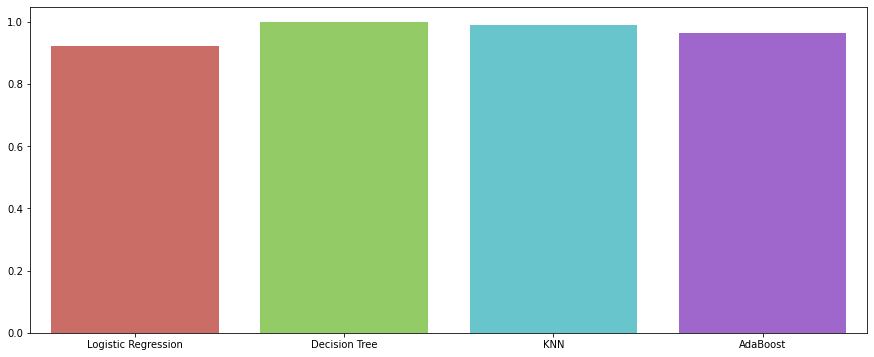

In [63]:
labels = ['Logistic Regression', 'Decision Tree', 'KNN','AdaBoost']
accuracies = [log_accuracy, dt_accuracy, knn_accuracy ,ada_accuracy]

plt.figure(figsize=(15,6))
sns.barplot(x =labels  , y = accuracies ,ci=None, palette = 'hls')
plt.show()

# Pickling the Model file for Deployement

In [65]:
import pickle
filename = 'logistic_regression_model.pkl'
pickle.dump(lr, open(filename, 'wb'))